# Wasserstein GAN Implementation

Importing all dependencies

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Importing MNIST Dataset

In [2]:
from tensorflow.keras.datasets import fashion_mnist, mnist

(trainX, trainY), (testX, testY) = mnist.load_data()

Reshaping training and testing data

In [3]:
trainX = [(image-127.5)/127.5 for image in trainX]
trainX = np.reshape(trainX, (60000, 28, 28, 1))
testX = [(image-127.5)/127.5 for image in testX]
testX = np.reshape(testX, (10000, 28, 28, 1))

Showing sample images

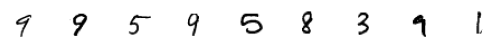

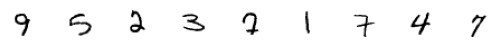

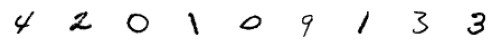

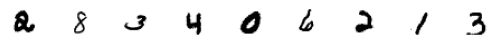

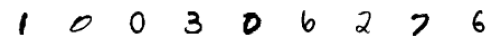

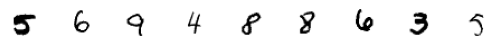

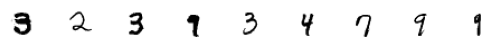

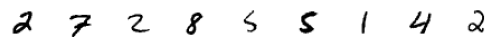

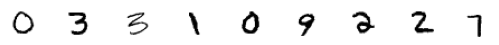

In [4]:
for _ in range(9):
    plt.figure(figsize=(9, 6))
    for j in range(9):
        i = np.random.randint(0, 54353)
        plt.subplot(990 + 1 + j)
        plt.imshow(trainX[i], cmap='gray_r')
        plt.axis('off')
    plt.show()

Defining necessary functions regarding Wasserstein loss, noise, fake_samples, real_samples, show_generator_results

In [5]:
def wasserstein_loss(real_y, calculated_y):
    return tf.keras.backend.mean(real_y * calculated_y)

index = [i for i in range(0, len(trainX))]

def get_random_noise(batch_size, noise_size):
    random_values = np.random.randn(batch_size*noise_size)
    random_noise_batches = np.reshape(random_values, (batch_size, noise_size))
    return random_noise_batches

def get_fake_samples(generator_network, batch_size, noise_size):
    random_noise_batches = get_random_noise(batch_size, noise_size) 
    fake_samples = generator.predict_on_batch(random_noise_batches)
    return fake_samples

def get_real_samples(batch_size):
    random_index = np.random.choice(index, size=batch_size)
    real_images = trainX[np.array(random_index),:]
    return real_images

def show_generator_results(generator_network):
    for _ in range(9):
        plt.figure(figsize=(9, 6))
        random_noise_batches = get_random_noise(9, noise_size) 
        fake_samples = generator.predict_on_batch(random_noise_batches)
        for j in range(7):
            i = j
            plt.subplot(990 + 1 + j)
            plt.imshow(((fake_samples[i,:,:,-1])/2.0)+0.5, cmap='gray_r')
            plt.axis('off')
        plt.show()
    return

Defining the Generator

In [6]:
#input layer
random_input = tf.keras.layers.Input(shape = 100)
layer = tf.keras.layers.Dense(7*7*128)(random_input)
layer = tf.keras.layers.Reshape((7, 7, 128))(layer)

#first deconv layer 
layer = tf.keras.layers.Conv2DTranspose(filters=128, kernel_size=(3,3), strides=2, padding='same')(layer)
layer = tf.keras.layers.BatchNormalization(momentum=0.8)(layer)
layer = tf.keras.layers.Activation('relu')(layer)

#second deconv layer
layer = tf.keras.layers.Conv2DTranspose(filters=128, kernel_size=(3,3), strides=2, padding='same')(layer)
layer = tf.keras.layers.BatchNormalization(momentum=0.8)(layer)
layer = tf.keras.layers.Activation('relu')(layer)

#third deconv layer
layer = tf.keras.layers.Conv2DTranspose(filters=128, kernel_size=(3,3), padding='same')(layer)
layer = tf.keras.layers.Activation('relu')(layer)

#output layer
layer = tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=(4,4), padding='same')(layer)
generated_image = tf.keras.layers.Activation('tanh')(layer)

generator = tf.keras.models.Model(inputs=random_input, outputs=generated_image)

Defining the Discriminator

In [7]:
#input layer
image_input = tf.keras.layers.Input(shape=(28, 28, 1))

#first conv layer
layer = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=2, padding='same')(image_input)
layer = tf.keras.layers.LeakyReLU(alpha=0.2)(layer)
layer = tf.keras.layers.Dropout(0.25)(layer)

#second conv layer
layer = tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=2, padding='same')(layer)
layer = tf.keras.layers.BatchNormalization(momentum=0.8)(layer)
layer = tf.keras.layers.LeakyReLU(alpha=0.2)(layer)
layer = tf.keras.layers.Dropout(0.25)(layer)

#third conv layer
layer = tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), strides=2, padding='same')(layer)
layer = tf.keras.layers.BatchNormalization(momentum=0.8)(layer)
layer = tf.keras.layers.LeakyReLU(alpha=0.2)(layer)
layer = tf.keras.layers.Dropout(0.25)(layer)

#fourth conv layer
layer = tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding='same')(layer)
layer = tf.keras.layers.BatchNormalization(momentum=0.8)(layer)
layer = tf.keras.layers.LeakyReLU(alpha=0.2)(layer)
layer = tf.keras.layers.Dropout(0.25)(layer)

#reshaping layer
layer = tf.keras.layers.Flatten()(layer)

# No activation in final layer
d_out = tf.keras.layers.Dense(1)(layer)

discriminator = tf.keras.models.Model(inputs=image_input, outputs=d_out)

Compiling the discriminator first

In [8]:
optimizer_RMS = tf.keras.optimizers.RMSprop(learning_rate=0.00005)
discriminator.compile(loss=wasserstein_loss, optimizer=optimizer_RMS, metrics=['accuracy'])

Making WGAN model with generator and discriminator

In [9]:
discriminator.trainable=False

g_output = generator(random_input)
d_output = discriminator(g_output)

wgan_model = tf.keras.models.Model(inputs = random_input, outputs = d_output)

Compiling WGAN model

In [10]:
wgan_model.compile(loss=wasserstein_loss, optimizer=optimizer_RMS)

Training the model

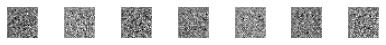

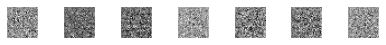

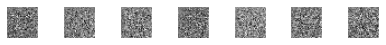

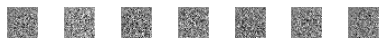

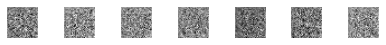

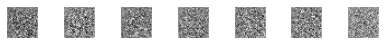

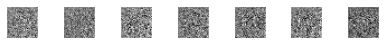

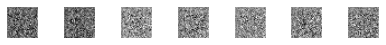

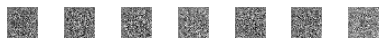

Epoch:0, Step:0, D-Loss:0.000143, G-Loss:-0.000385
Epoch:0, Step:50, D-Loss:-0.002710, G-Loss:-0.003737
Epoch:0, Step:100, D-Loss:0.000128, G-Loss:-0.002141
Epoch:0, Step:150, D-Loss:0.000014, G-Loss:-0.002793
Epoch:0, Step:200, D-Loss:-0.000222, G-Loss:-0.000302
Epoch:0, Step:250, D-Loss:0.000198, G-Loss:-0.000447
Epoch:0, Step:300, D-Loss:0.000033, G-Loss:0.000045
Epoch:0, Step:350, D-Loss:0.000029, G-Loss:-0.000041
Epoch:0, Step:400, D-Loss:0.000042, G-Loss:-0.000062
Epoch:0, Step:450, D-Loss:0.000019, G-Loss:-0.000020


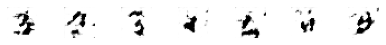

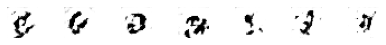

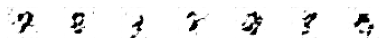

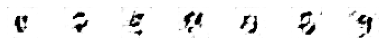

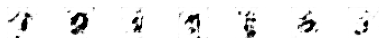

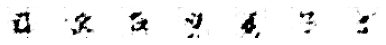

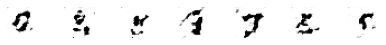

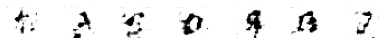

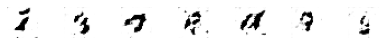

Epoch:1, Step:0, D-Loss:0.000029, G-Loss:0.000033
Epoch:1, Step:50, D-Loss:-0.000030, G-Loss:0.000208
Epoch:1, Step:100, D-Loss:-0.000190, G-Loss:0.000598
Epoch:1, Step:150, D-Loss:-0.000624, G-Loss:0.000713
Epoch:1, Step:200, D-Loss:-0.001036, G-Loss:0.000733
Epoch:1, Step:250, D-Loss:-0.001257, G-Loss:0.001600
Epoch:1, Step:300, D-Loss:-0.001895, G-Loss:0.001335
Epoch:1, Step:350, D-Loss:-0.000564, G-Loss:0.001488
Epoch:1, Step:400, D-Loss:-0.001692, G-Loss:0.002074
Epoch:1, Step:450, D-Loss:-0.001172, G-Loss:0.001543


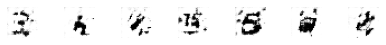

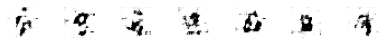

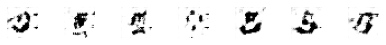

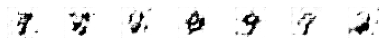

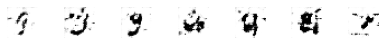

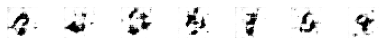

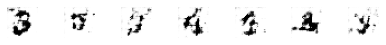

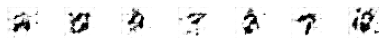

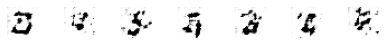

Epoch:2, Step:0, D-Loss:-0.001985, G-Loss:0.002190
Epoch:2, Step:50, D-Loss:-0.002969, G-Loss:0.002887
Epoch:2, Step:100, D-Loss:0.000264, G-Loss:0.001527
Epoch:2, Step:150, D-Loss:-0.000664, G-Loss:0.002380
Epoch:2, Step:200, D-Loss:-0.003136, G-Loss:0.003239
Epoch:2, Step:250, D-Loss:-0.001899, G-Loss:0.002912
Epoch:2, Step:300, D-Loss:-0.002620, G-Loss:0.003771
Epoch:2, Step:350, D-Loss:-0.001475, G-Loss:0.003919
Epoch:2, Step:400, D-Loss:-0.004389, G-Loss:0.004224
Epoch:2, Step:450, D-Loss:-0.002639, G-Loss:0.003483


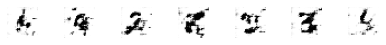

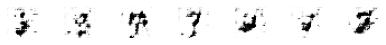

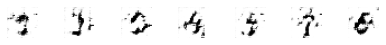

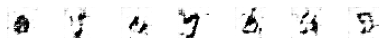

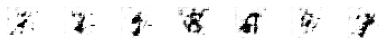

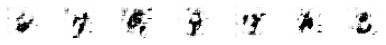

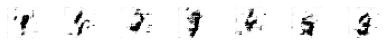

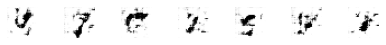

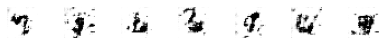

Epoch:3, Step:0, D-Loss:-0.003107, G-Loss:0.004383
Epoch:3, Step:50, D-Loss:-0.000745, G-Loss:0.003540
Epoch:3, Step:100, D-Loss:-0.001764, G-Loss:0.004216
Epoch:3, Step:150, D-Loss:-0.001168, G-Loss:0.003255
Epoch:3, Step:200, D-Loss:-0.001670, G-Loss:0.003703
Epoch:3, Step:250, D-Loss:-0.001387, G-Loss:0.003809
Epoch:3, Step:300, D-Loss:-0.000878, G-Loss:0.003584
Epoch:3, Step:350, D-Loss:-0.003770, G-Loss:0.003748
Epoch:3, Step:400, D-Loss:0.000400, G-Loss:0.003630
Epoch:3, Step:450, D-Loss:-0.000478, G-Loss:0.003659


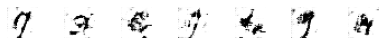

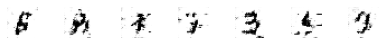

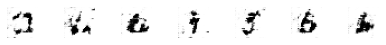

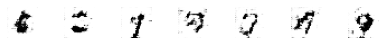

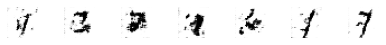

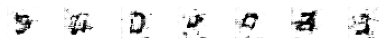

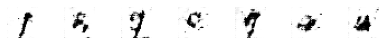

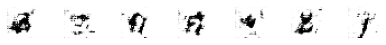

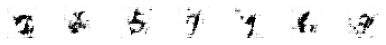

Epoch:4, Step:0, D-Loss:-0.004477, G-Loss:0.003582
Epoch:4, Step:50, D-Loss:-0.002984, G-Loss:0.004157
Epoch:4, Step:100, D-Loss:-0.003178, G-Loss:0.003816
Epoch:4, Step:150, D-Loss:-0.004138, G-Loss:0.003784
Epoch:4, Step:200, D-Loss:-0.000469, G-Loss:0.003383
Epoch:4, Step:250, D-Loss:-0.000927, G-Loss:0.002618
Epoch:4, Step:300, D-Loss:0.000048, G-Loss:0.001818
Epoch:4, Step:350, D-Loss:-0.001595, G-Loss:0.001267
Epoch:4, Step:400, D-Loss:-0.001372, G-Loss:0.001629
Epoch:4, Step:450, D-Loss:-0.000166, G-Loss:0.001598


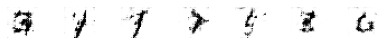

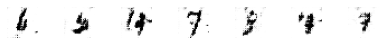

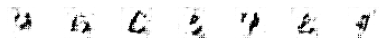

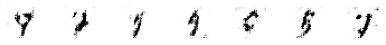

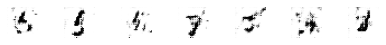

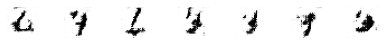

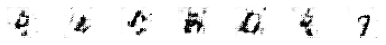

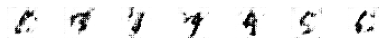

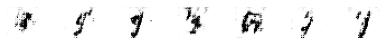

Epoch:5, Step:0, D-Loss:-0.000655, G-Loss:0.002387
Epoch:5, Step:50, D-Loss:-0.002212, G-Loss:0.002409
Epoch:5, Step:100, D-Loss:0.000290, G-Loss:-0.004578
Epoch:5, Step:150, D-Loss:-0.000246, G-Loss:-0.003141
Epoch:5, Step:200, D-Loss:-0.000293, G-Loss:-0.000779
Epoch:5, Step:250, D-Loss:-0.001915, G-Loss:0.001411
Epoch:5, Step:300, D-Loss:-0.001612, G-Loss:0.000813
Epoch:5, Step:350, D-Loss:-0.004050, G-Loss:0.001659
Epoch:5, Step:400, D-Loss:0.000602, G-Loss:-0.001890
Epoch:5, Step:450, D-Loss:0.000571, G-Loss:-0.002089


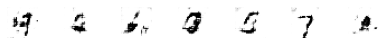

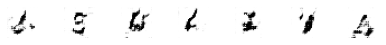

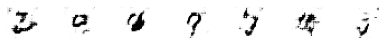

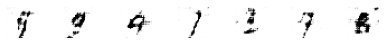

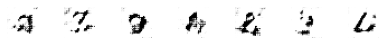

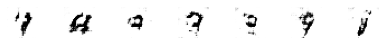

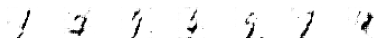

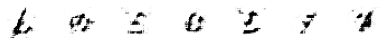

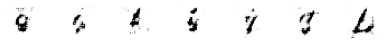

Epoch:6, Step:0, D-Loss:-0.004884, G-Loss:0.001928
Epoch:6, Step:50, D-Loss:-0.000338, G-Loss:-0.004347
Epoch:6, Step:100, D-Loss:0.000525, G-Loss:-0.004089
Epoch:6, Step:150, D-Loss:0.000012, G-Loss:-0.001178
Epoch:6, Step:200, D-Loss:0.000013, G-Loss:-0.000522
Epoch:6, Step:250, D-Loss:0.000010, G-Loss:-0.000208
Epoch:6, Step:300, D-Loss:-0.000107, G-Loss:0.000042
Epoch:6, Step:350, D-Loss:0.000237, G-Loss:0.000015
Epoch:6, Step:400, D-Loss:-0.000382, G-Loss:0.000257
Epoch:6, Step:450, D-Loss:-0.000291, G-Loss:0.000422


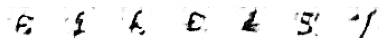

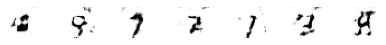

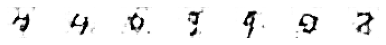

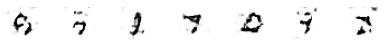

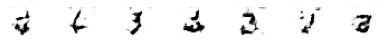

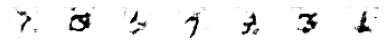

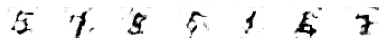

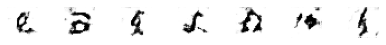

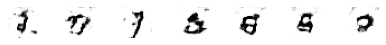

Epoch:7, Step:0, D-Loss:-0.000475, G-Loss:0.000467


In [ ]:
epochs = 200
batch_size = 64
steps = 500
noise_size = 100

for i in range(0, epochs):
    if (i%1 == 0):
        gen_output = show_generator_results(generator)
    for j in range(steps):
        #running with 5 discriminators
        for _ in range(5):
            fake_samples = get_fake_samples(generator, batch_size//2, noise_size)
            real_samples = get_real_samples(batch_size=batch_size//2)

            fake_y = np.ones((batch_size//2, 1))
            real_y = -1 * np.ones((batch_size//2, 1))

            # Updating Discriminator weights

            discriminator.trainable=True
            loss_d_real = discriminator.train_on_batch(real_samples, real_y)
            loss_d_fake = discriminator.train_on_batch(fake_samples, fake_y)
            
            loss_d = np.add(loss_d_real, loss_d_fake)/2.0

            # Discriminator weights clipping
            for l in discriminator.layers:
                weights = l.get_weights()
                weights = [np.clip(w, -0.01, 0.01) for w in weights]
                l.set_weights(weights)
            
            if False:
                print ("D_real_loss: %.3f, D_fake_loss: %.3f, D_loss: %.3f"%(loss_d_real[0], loss_d_fake[0], loss_d[0]))
        
        noise_batches = get_random_noise(batch_size, noise_size)
        
        wgan_input = noise_batches
        
        # Make the Discriminator belive that these are real samples and calculate loss to train the generator
        wgan_output = -1 * np.ones((batch_size, 1))
        
        # Updating Generator weights
        discriminator.trainable=False
        loss_g = wgan_model.train_on_batch(wgan_input, wgan_output)
        
        if j%50 == 0:
            print ("Epoch:%.0f, Step:%.0f, D-Loss:%.6f, G-Loss:%.6f"%(i,j,loss_d[0] ,loss_g))

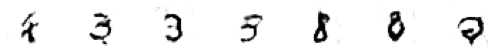

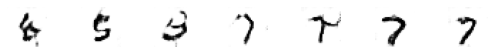

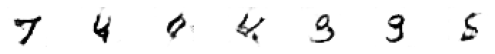

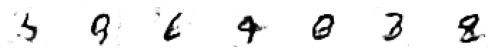

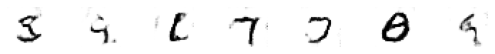

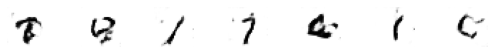

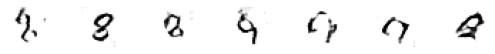

----------------------------------------------------------------------------------------------------


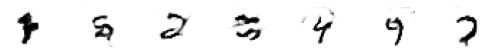

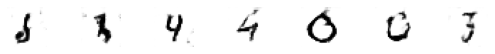

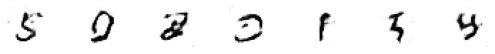

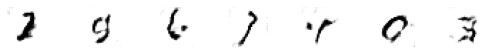

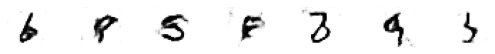

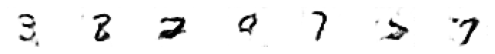

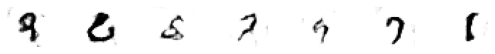

----------------------------------------------------------------------------------------------------


In [22]:
for _ in range(1):
    show_generator_results(generator)
    print("-"*100)